In [2]:
import numpy as np
import pandas as pd
import csv
import os
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


/Users/farzanaiqbal/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/farzanaiqbal/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
data = pd.read_csv('./California.csv', sep=',')
labels = pd.read_csv('./Labels.csv', sep=',') # LA1and10 in data
data = data[0:8044]
print data.shape
print labels.shape

(8044, 147)
(8044, 1)


In [158]:
data.describe()

,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,...,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000
mean,0.913973,4631.272501,1563.587519,0.008329,101.916459,0.023027,0.067379,0.272874,0.062904,0.076082,...,527.910741,2667.072849,285.812034,604.302213,17.949528,45.102064,1011.033814,1742.133143,122.433118,137.069617
std,0.280421,1977.568054,679.129092,0.090889,534.927392,0.095636,0.250694,0.445464,0.242805,0.265145,...,329.427201,1429.233539,454.893516,809.033332,31.394181,59.731586,825.980179,1539.614426,156.513017,139.227194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3355.000000,1103.750000,0.000000,1.000000,0.000233,0.000000,0.000000,0.000000,0.000000,...,308.000000,1652.000000,52.000000,120.000000,3.000000,18.000000,375.000000,553.000000,35.000000,35.000000
50%,1.000000,4410.500000,1476.000000,0.000000,12.000000,0.002752,0.000000,0.000000,0.000000,0.000000,...,465.000000,2467.500000,123.000000,312.000000,9.000000,34.000000,770.000000,1266.000000,79.000000,95.000000
75%,1.000000,5653.250000,1945.000000,0.000000,51.000000,0.011397,0.000000,1.000000,0.000000,0.000000,...,672.250000,3425.000000,307.000000,726.250000,20.000000,56.000000,1450.250000,2549.000000,157.000000,195.000000
max,1.000000,37452.000000,8382.000000,1.000000,16575.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5788.000000,28477.000000,5971.000000,10485.000000,755.000000,2506.000000,8839.000000,13341.000000,2428.000000,1368.000000


In [25]:
#pd.head(data)

#data['LILATracts_1And20'].type
data['CensusTract'] = data['CensusTract'].astype(np.str, copy=False)
data['CensusTract'].dtype

#print data[0:5]


dtype('O')

In [106]:
county_counts = pd.DataFrame(data['County'].value_counts())
print county_counts
# LA over represented here 

                 County
Los Angeles        2343
San Diego           628
Orange              583
Riverside           453
Santa Clara         372
San Bernardino      369
Alameda             360
Sacramento          317
Contra Costa        208
Fresno              199
San Francisco       196
Ventura             174
San Mateo           158
Kern                151
San Joaquin         139
Sonoma               99
Solano               96
Stanislaus           94
Monterey             93
Santa Barbara        90
Placer               85
Tulare               78
Marin                55
San Luis Obispo      53
Santa Cruz           52
Butte                51
Merced               49
Shasta               48
El Dorado            43
Yolo                 41
Napa                 40
Imperial             31
Humboldt             30
Kings                27
Madera               23
Sutter               21
Mendocino            20
Nevada               20
Lake                 15
Siskiyou             14
Yuba            

In [155]:
data['LA1and10'].value_counts() # we will go w/ this definintion

0    6076
1    1968
Name: LA1and10, dtype: int64

In [154]:
data['LAhalfand10'].value_counts() # this is when you consider 1/2 mile for food deserts. Dramatically increases FDs

1    5650
0    2394
Name: LAhalfand10, dtype: int64

In [157]:
census_desert = pd.DataFrame(data['LA1and10'].groupby(data['County']).sum())
census_desert['County Counts'] = county_counts['County']
census_desert['FoodDShare'] = census_desert['LA1and10']/census_desert['County Counts']

a = pd.DataFrame(data['lapop10'].groupby(data['County']).sum())
b = pd.DataFrame(data['POP2010'].groupby(data['County']).sum())

census_desert['lapop10'] = a['lapop10']
census_desert['Population'] = b['POP2010']
census_desert['PopShare'] = census_desert['lapop10']/census_desert['Population']


census_desert
# coutns of food deserts and census tracts by county, share and population

,LA1and10,County Counts,FoodDShare,lapop10,Population,PopShare
County,,,,,,
Alameda,56,360,0.155556,120.787117,1510271,0.000080
Alpine,1,1,1.000000,575.162592,1175,0.489500
Amador,0,9,0.000000,5.355328,38091,0.000141
Butte,25,51,0.490196,1347.163722,220000,0.006123
Calaveras,2,10,0.200000,94.461985,45578,0.002073
Colusa,3,5,0.600000,1478.402257,21419,0.069023
Contra Costa,97,208,0.466346,0.000000,1049025,0.000000
Del Norte,4,7,0.571429,2942.934650,28610,0.102864
El Dorado,18,43,0.418605,204.910687,181058,0.001132


In [159]:
# comparing lapophalf to lapop10 and lapop20. Different definintons  of food deserts
comparision = data[['CensusTract', 'County', 'lapophalf', 'lapop1', 'lapop10', 'lapop20', 'POP2010', 'LA1and10', 'LAhalfand10']]
print comparision

     CensusTract   County     lapophalf        lapop1      lapop10  lapop20  \
0     6001400100  Alameda   2898.254926   1772.864756     0.000000      0.0   
1     6001400200  Alameda      0.000000      0.000000     0.000000      0.0   
2     6001400300  Alameda    352.947122      0.000000     0.000000      0.0   
3     6001400400  Alameda     79.819428      0.000000     0.000000      0.0   
4     6001400500  Alameda    889.003919      0.000000     0.000000      0.0   
5     6001400600  Alameda   1571.000033      0.000000     0.000000      0.0   
6     6001400700  Alameda   4101.883197      0.000000     0.000000      0.0   
7     6001400800  Alameda   2832.140625      0.000000     0.000000      0.0   
8     6001400900  Alameda   2016.227836      0.000000     0.000000      0.0   
9     6001401000  Alameda   1882.929072      0.000000     0.000000      0.0   
10    6001401100  Alameda    301.408694      0.000000     0.000000      0.0   
11    6001401200  Alameda      0.000000      0.00000

In [162]:
#this highlights difference between lapophalf and lapop1, specifically in Contra Costa county which is largely urban
a = comparision.loc[comparision['County'] == 'Contra Costa']
print a

    CensusTract        County     lapophalf       lapop1  lapop10  lapop20  \
436  6013301000  Contra Costa   3659.000001  3659.000001      0.0      0.0   
437  6013302005  Contra Costa   1050.676858     0.000000      0.0      0.0   
438  6013302006  Contra Costa    580.338173     2.298813      0.0      0.0   
439  6013302007  Contra Costa   4961.244180  3435.968477      0.0      0.0   
440  6013302008  Contra Costa   7718.000003  7717.227339      0.0      0.0   
441  6013302009  Contra Costa   2800.919335   411.705302      0.0      0.0   
442  6013302010  Contra Costa   9132.380680  2668.051348      0.0      0.0   
443  6013303102  Contra Costa   5616.413151  2407.184751      0.0      0.0   
444  6013303103  Contra Costa   6870.005403  2888.440235      0.0      0.0   
445  6013303201  Contra Costa   5065.554245  1255.388004      0.0      0.0   
446  6013303202  Contra Costa   6378.807884   414.685713      0.0      0.0   
447  6013303203  Contra Costa   3200.575463     0.000000      0.

In [104]:
a = pd.DataFrame(data['lapop10'].groupby(data['County']).sum())
b = pd.DataFrame(data['POP2010'].groupby(data['County']).sum())

a['Population'] = b['POP2010']
a['Share'] = a['lapop10']/a['Population']
print a

                      lapop10  Population     Share
County                                             
Alameda            120.787117     1510271  0.000080
Alpine             575.162592        1175  0.489500
Amador               5.355328       38091  0.000141
Butte             1347.163722      220000  0.006123
Calaveras           94.461985       45578  0.002073
Colusa            1478.402257       21419  0.069023
Contra Costa         0.000000     1049025  0.000000
Del Norte         2942.934650       28610  0.102864
El Dorado          204.910687      181058  0.001132
Fresno            6659.882677      930450  0.007158
Glenn             1419.381015       28122  0.050472
Humboldt          4854.993465      134623  0.036064
Imperial         11818.804549      174528  0.067719
Inyo              4224.351968       18546  0.227777
Kern             17268.789398      839631  0.020567
Kings               98.935107      152982  0.000647
Lake                88.691309       64665  0.001372
Lassen      

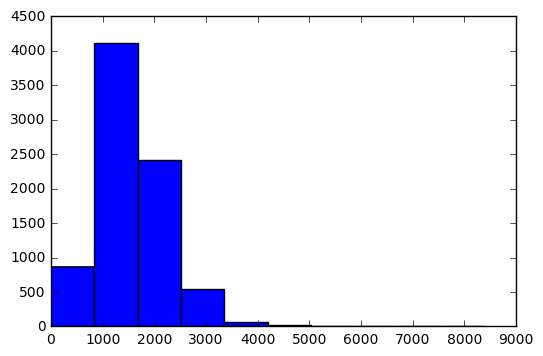

In [163]:
plt.hist(data['OHU2010'])
plt.show()

In [164]:
a = data['POP2010'] > 15000
print a.sum()

20


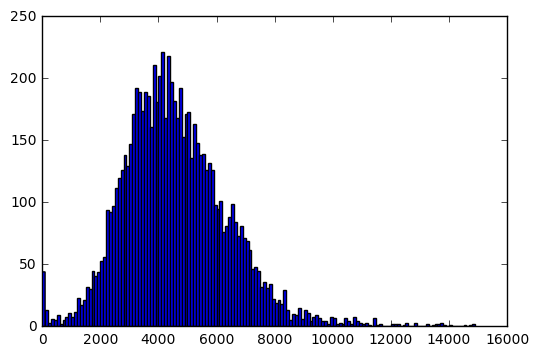

In [167]:
plt.hist(data['POP2010'], bins=range(0,15000, 100))
plt.show()

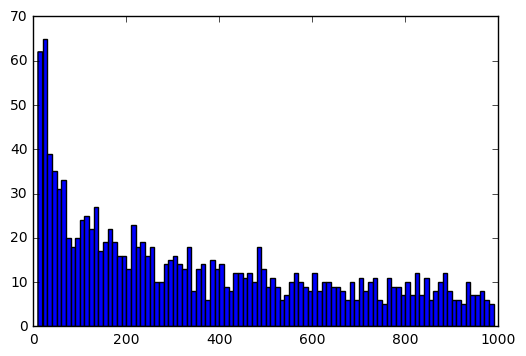

In [181]:
#data['lapop10'].value_counts()
# population of food desersts (1 mile or more) (notice range starts from 10)
plt.hist(data['lapop1'], bins=range(10,1000, 10)) 
plt.show()

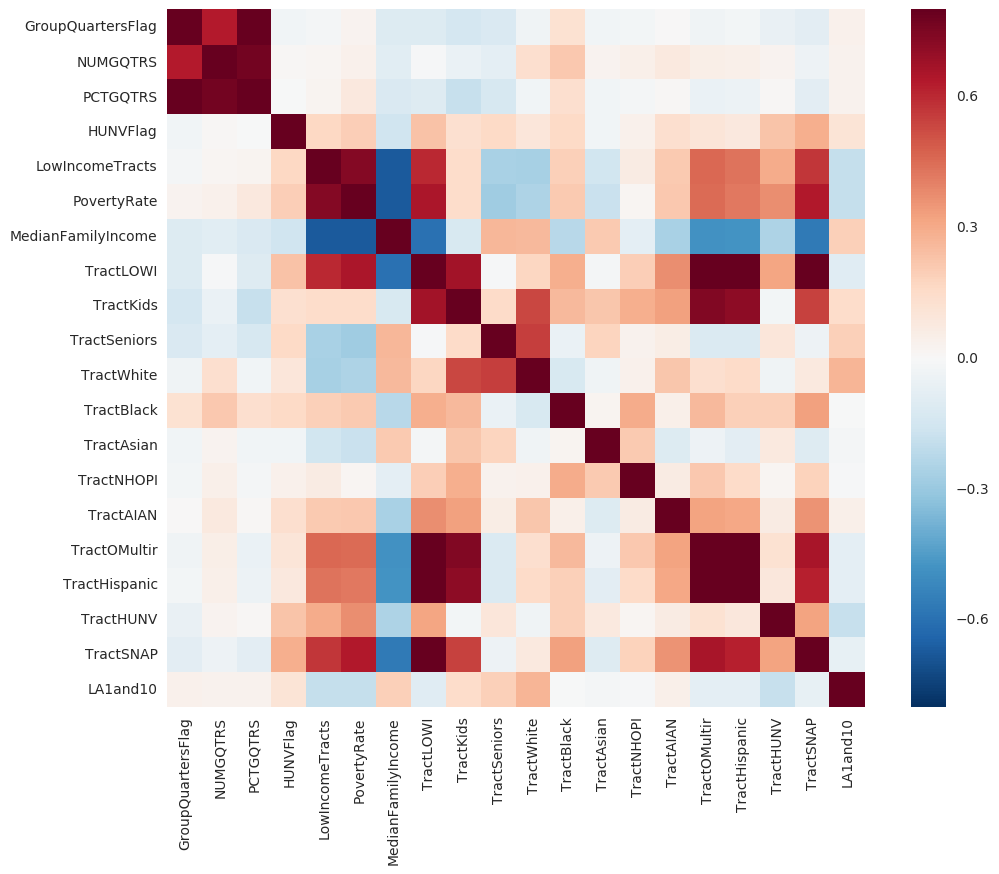

In [187]:
condensed_data = pd.read_csv('./Baseline.csv', sep=',')
condensed_data['LA1and10'] = labels['LA1and10']
#labels = pd.read_csv('./Labels.csv', sep=',')

import seaborn as sns
corrmat = condensed_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
# some odd correlations between LA1and10, poverty rate, income, and being white

In [193]:
# Not using condensed data (Matt's cleaned version)
# strong neg correlation between population and urban, positive for kids, white  
focus_columns = ['LA1and10', 'lapop1']
data.corr().filter(focus_columns)

,LA1and10,lapop1
Urban,0.072503,-0.411637
POP2010,0.159947,0.359037
OHU2010,0.142953,0.258366
GroupQuartersFlag,0.043300,0.092908
NUMGQTRS,0.036236,0.231285
PCTGQTRS,0.037056,0.101105
LILATracts_1And10,0.472289,0.243712
LILATracts_halfAnd10,0.003235,-0.090555
LILATracts_1And20,0.455243,0.227097
LILATracts_Vehicle,0.049380,0.058081


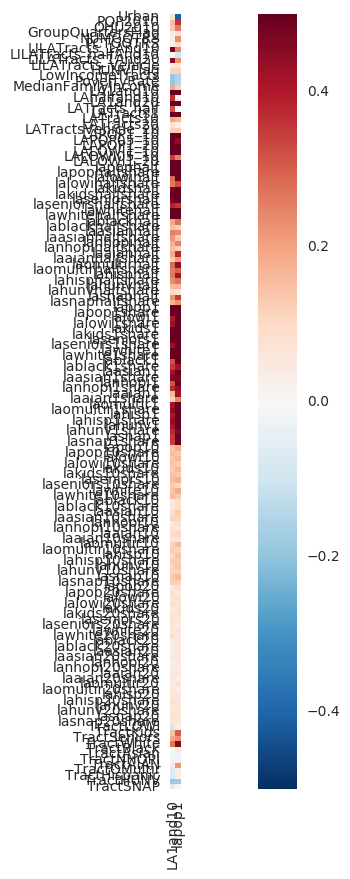

In [197]:
import seaborn as sns
corrmat = data.corr().filter(focus_columns)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.5, square=True);
plt.show()

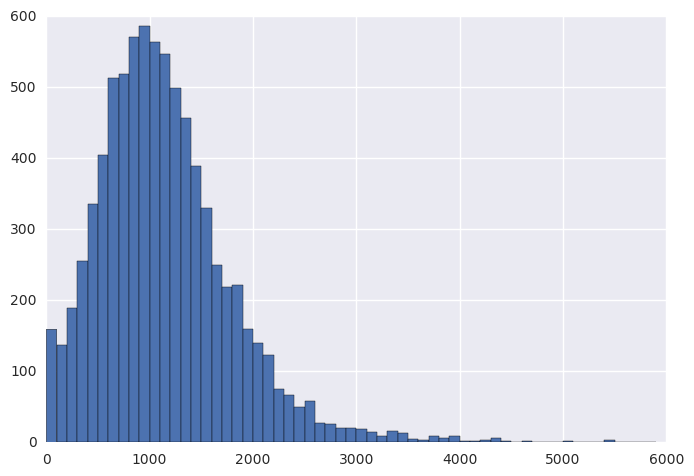

In [200]:
plt.hist(data['TractKids'],bins=range(0,6000, 100)) 
plt.show()

In [209]:
food_deserts = data[data['LA1and10']==1] # data frame for only food deserts

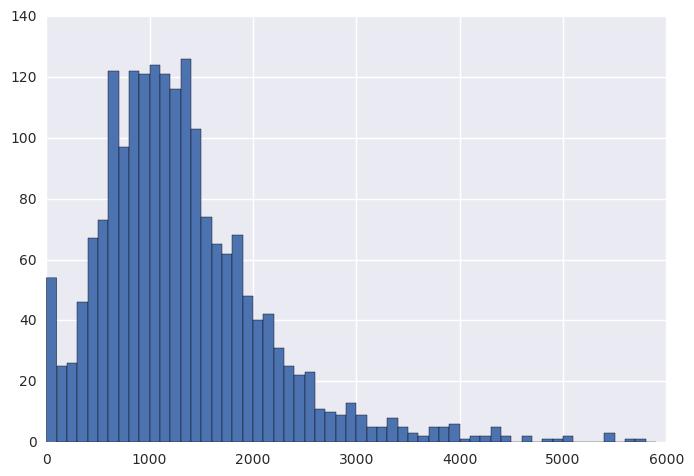

In [210]:
plt.hist(food_deserts['TractKids'],bins=range(0,6000, 100)) 
plt.show()

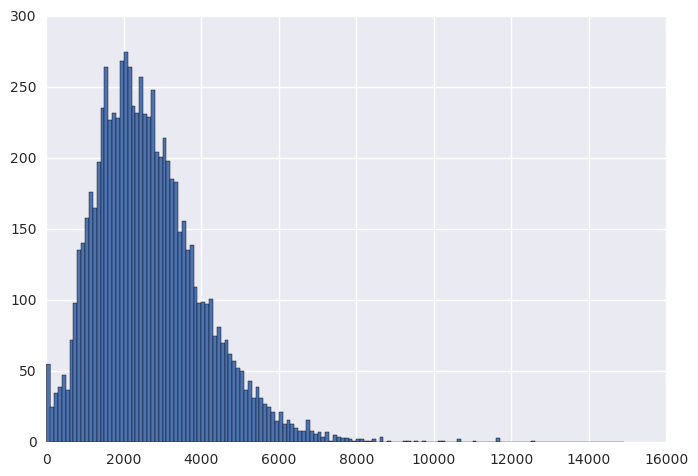

In [212]:
plt.hist(data['TractWhite'] ,bins=range(0,15000, 100)) 
plt.show()

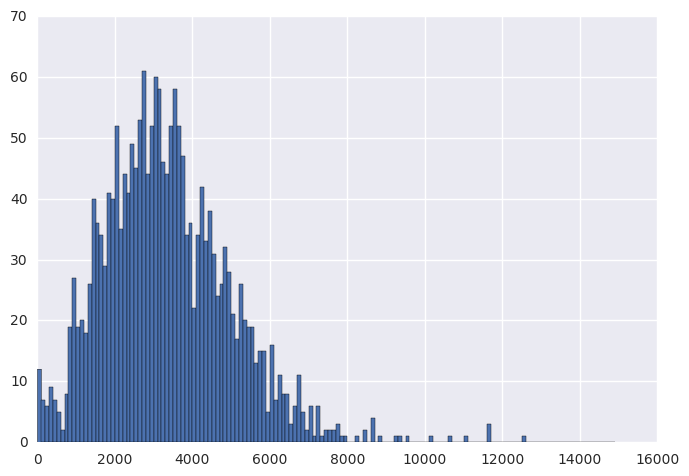

In [213]:
plt.hist(food_deserts['TractWhite'] ,bins=range(0,15000, 100)) 
plt.show()